In [2]:
import pandas

titanic = pandas.read_csv("https://databootcamp.nyc3.digitaloceanspaces.com/titanic_2.csv")

In [2]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa-1,AgeFillNaSexMean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0


## Tranformação de colunas do tipo **String**

Podemos tratar as Strings fazendo um _apply_... **mas existe uma maneira mais simples para aplicar algumas tranformações!**

Quando em uma coluna é tipo `object` podemos acessar as funções do tipo `string` usando a propriedade `str`.

In [3]:
titanic.dtypes

PassengerId           int64
Survived              int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
Relatives             int64
AgeRange             object
AgeNotNull          float64
AgeFillNa-1         float64
AgeFillNaSexMean    float64
dtype: object

In [4]:
titanic["Name"].str

**2.1 - `replace` em todos os dados de uma coluna**

Vamos começar com uma tranformação simples: retirar as vírgulas.

`Braund, Mr. Owen Harris => Braund Mr. Owen Harris`

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa-1,AgeFillNaSexMean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,adulto,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,adulto,35.0,35.0,35.0


In [6]:
titanic["Name"].str.replace(",","").head(10)

0                               Braund Mr. Owen Harris
1    Cumings Mrs. John Bradley (Florence Briggs Tha...
2                                Heikkinen Miss. Laina
3          Futrelle Mrs. Jacques Heath (Lily May Peel)
4                              Allen Mr. William Henry
5                                      Moran Mr. James
6                               McCarthy Mr. Timothy J
7                        Palsson Master. Gosta Leonard
8     Johnson Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**2.1 - `split` em todos os dados de uma coluna**

Usando isso vamos conseguir separar o sobrenome.

Primeiro como funciona o split?

In [8]:
name = "Meu, Exemplo, Exemplo"
name.split(",")

['Meu', ' Exemplo', ' Exemplo']

O `split` divide as strings criando uma lista para cada elemento, a divisão para cada elemento é via um separador nesse caso `,` por padrão o divisor é o espaço em branco.

Ao aplicar o `split` na coluna o retorno é uma coluna com uma `lista` dentro.

In [9]:
titanic["Name"].str.split(",")

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

Nós podemos criar uma coluna para cada termo da lista usando o `expand`.

In [11]:
dataframe_nome_dividido = titanic["Name"].str.split(",", expand=True)
dataframe_nome_dividido.head(20)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
5,Moran,Mr. James
6,McCarthy,Mr. Timothy J
7,Palsson,Master. Gosta Leonard
8,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,Nasser,Mrs. Nicholas (Adele Achem)


Com isso criamos duas colunas, uma com o sobrenome `0` e outra com o nome completo. 

Vamos associar a coluna **sobrenome** ao nosso dataframe.

In [15]:
dataframe_nome_dividido[1].head()

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: 1, dtype: object

In [13]:
titanic["Sobrenome"] = dataframe_nome_dividido[0]

In [17]:
titanic["Nome_limpo"] = dataframe_nome_dividido[1]

Vamos ver como ficou.

In [18]:
nome_completo_sobrenome = ["Name", "Sobrenome", "Nome_limpo"]

titanic[nome_completo_sobrenome].head()

,Name,Sobrenome,Nome_limpo
0,"Braund, Mr. Owen Harris",Braund,Mr. Owen Harris
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,"Heikkinen, Miss. Laina",Heikkinen,Miss. Laina
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,"Allen, Mr. William Henry",Allen,Mr. William Henry


                 PassengerId
Embarked Sex                
C        female           73
         male             95
Q        female           36
         male             41
S        female          203
         male            441


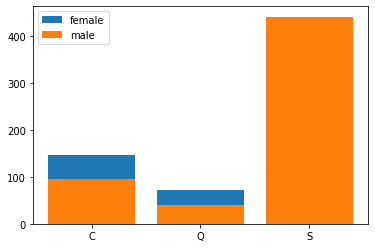

In [3]:
#solução João
import matplotlib.pyplot as plt

df = pandas.DataFrame(titanic.groupby([ "Embarked", "Sex"])['PassengerId'].count())
df.reset_index(inplace=True)
df_female = df[df['Sex'] == 'female']
df_male = df[df['Sex'] == 'male']

plt.bar(df_female['Embarked'], df_female['PassengerId'], bottom = df_female['PassengerId'],
        label = 'female')
plt.bar(df_male['Embarked'], df_male['PassengerId'],  label = 'male')
plt.legend()
plt.show()


### **Desafio:** Vamos criar uma coluna com o nome da mulher `NomeMulher`.

**Infelizmente, nos dados do Titanic o nome do marido aparecia na frente do nome da mulher, o nome da mulher aparecia entre parênteses `()`**

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [21]:
nome_mulher = titanic["Name"].str.split("(", expand=True)
nome_mulher.head()

,0,1,2
0,"Braund, Mr. Owen Harris",None,None
1,"Cumings, Mrs. John Bradley",Florence Briggs Thayer),None
2,"Heikkinen, Miss. Laina",None,None
3,"Futrelle, Mrs. Jacques Heath",Lily May Peel),None
4,"Allen, Mr. William Henry",None,None


In [22]:
titanic["nome_mulher"] = nome_mulher[1]
titanic["nome_mulher"].head()

0                       None
1    Florence Briggs Thayer)
2                       None
3             Lily May Peel)
4                       None
Name: nome_mulher, dtype: object

In [23]:
titanic["nome_mulher"] = titanic["nome_mulher"].str.replace(")", "")

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa-1,AgeFillNaSexMean,Sobrenome,Nome_limpo,nome_mulher
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0,Braund,Mr. Owen Harris,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0,Heikkinen,Miss. Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,adulto,35.0,35.0,35.0,Futrelle,Mrs. Jacques Heath (Lily May Peel),Lily May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,adulto,35.0,35.0,35.0,Allen,Mr. William Henry,None


## Tabela de frequência

![pivot](http://web.cse.ohio-state.edu/~reeves.92/CSE4194/Lab6Pivot_files/image041.png)

Para entender a correlação entre duas variáveis precisamos colocá-las lado a lado.

O Pandas nos oferece uma funcionalidade de crosstab (tabela de frequência).


**Vamos fazer a tabela de frequência entre os sobrenomes e as cabine, para validarmos se cada cabine possuia apenas uma família**

In [25]:
pandas.crosstab(titanic["Cabin"], titanic["Sobrenome"]).head(10)

Sobrenome,Allen,Allison,Anderson,Andrews,Appleton,Astor,Aubart,Ball,Barkworth,Baxter,...,Van der hoef,Walker,Warren,Webber,White,Wick,Widener,Williams-Lambert,Woolner,Young
Cabin,,,,,,,,,,,,,,,,,,,,,
A10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Nós conseguimos fazer operações em uma `crosstab`, como por exemplo somar a quantidade de famílias (sobrenomes diferentes) em uma cabine.

In [26]:
tabela_frequencia_cabine_sobrenome = pandas.crosstab(titanic["Cabin"], titanic["Sobrenome"])

(tabela_frequencia_cabine_sobrenome > 0).sum(axis=1)

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     1
G6     2
T      1
Length: 147, dtype: int64

Usamos o `axis=1` para somar as famílias por cabine.

Podemos ordenar para ver as cabines com mais famílias.

In [28]:
familias_diferentes_por_cabine = (tabela_frequencia_cabine_sobrenome > 0).sum(axis=1)
familias_diferentes_por_cabine.sort_values(ascending=False).head(15)

Cabin
F33      3
D        3
E101     3
B5       2
D20      2
B28      2
E33      2
B35      2
C124     2
C125     2
E24      2
D17      2
G6       2
B77      2
F G73    2
dtype: int64

Se quisermos inverter e usar como eixo as famílias basta usar o `axis=0`

In [29]:
cabines_diferentes_por_familia = (tabela_frequencia_cabine_sobrenome > 0).sum(axis=0)
cabines_diferentes_por_familia.sort_values(ascending=False).head()

Sobrenome
Graham     3
Thayer     2
Hays       2
Brown      2
Taussig    2
dtype: int64